In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


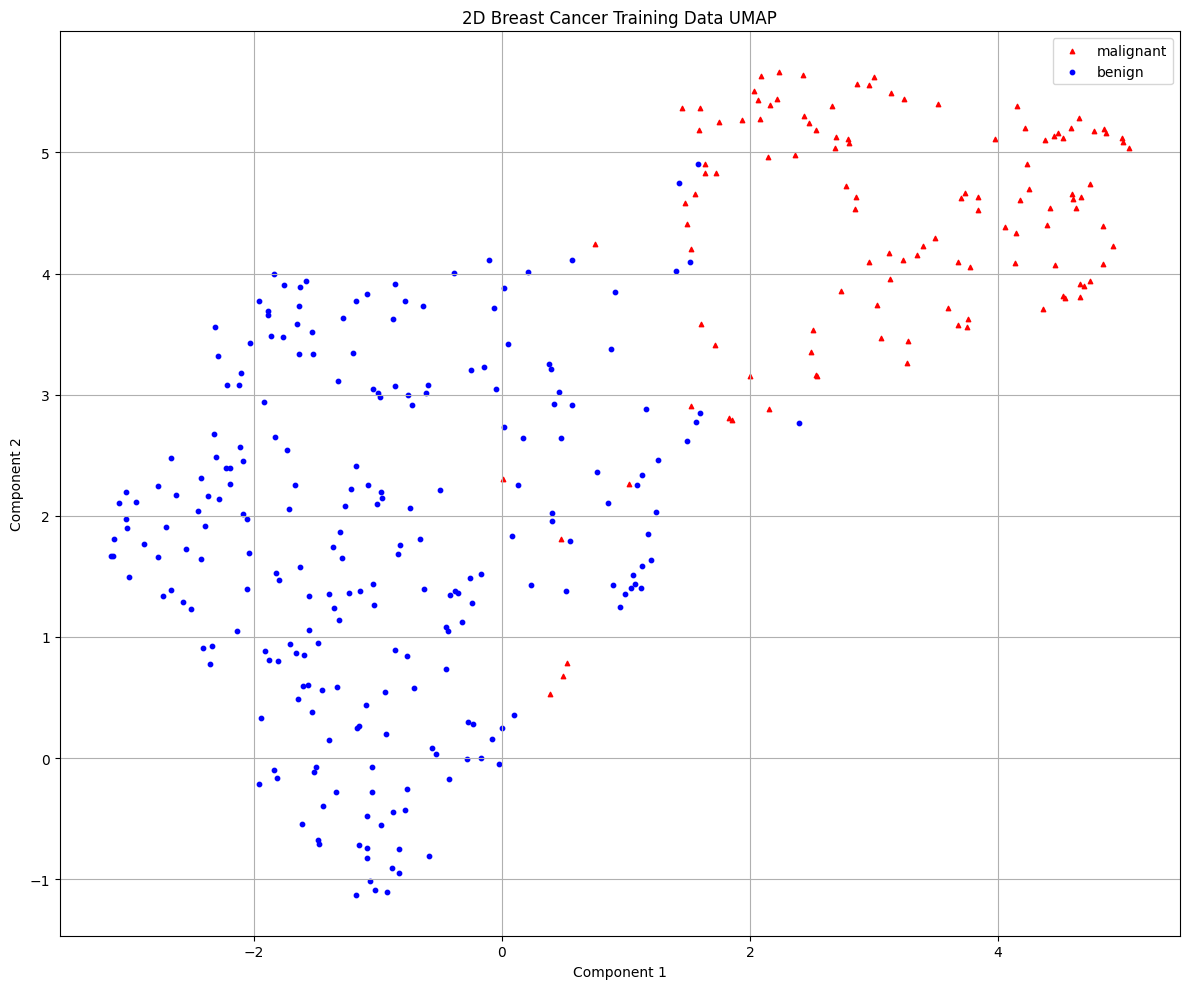

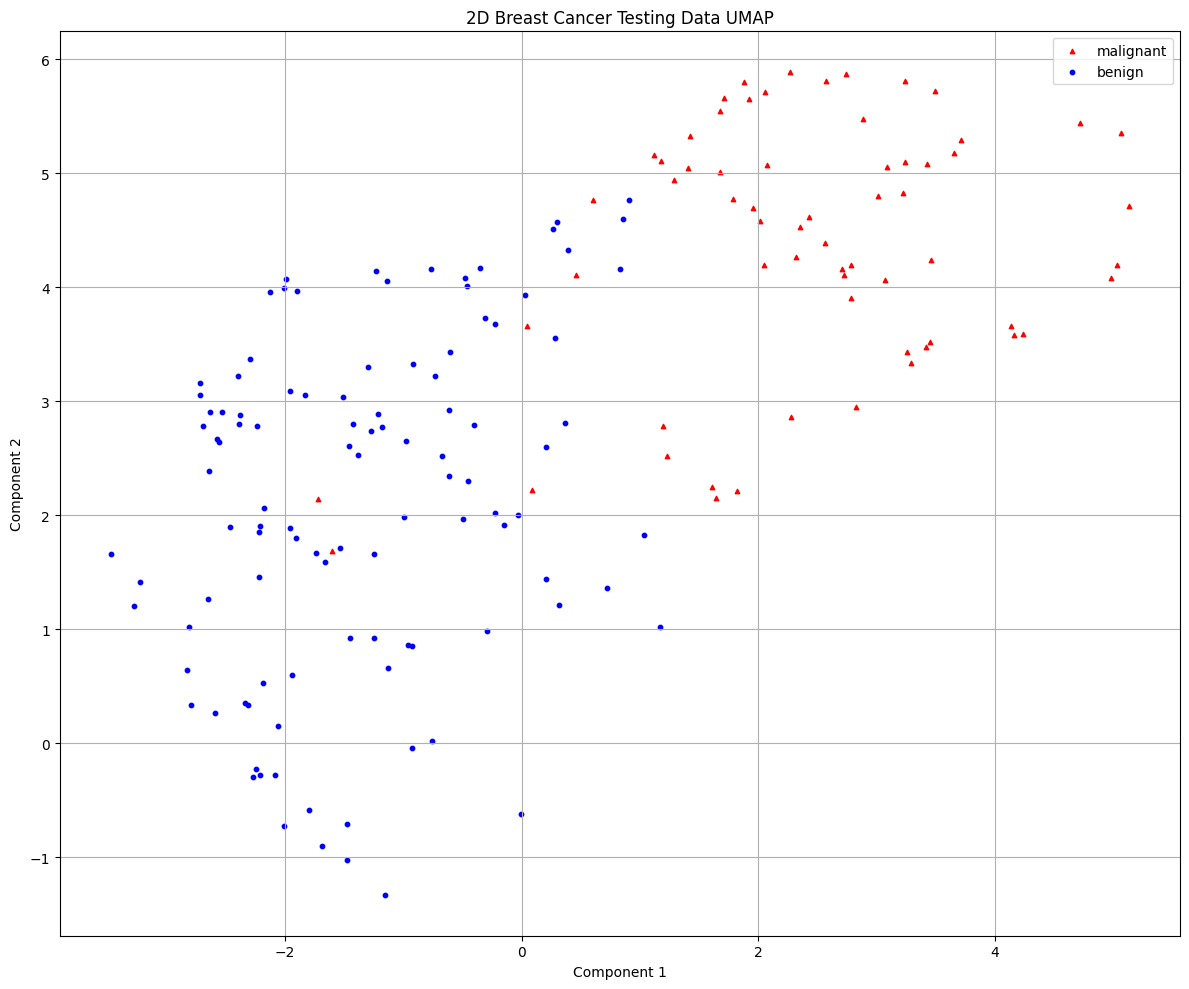

[I 2025-04-27 13:00:44,044] A new study created in memory with name: no-name-0d5d9f9a-524f-46dc-97dc-fc6955764376
[I 2025-04-27 13:01:13,342] Trial 0 finished with value: 0.9517505030181088 and parameters: {'n_estimators': 4551, 'max_depth': 15, 'learning_rate': 0.1510023092073636, 'subsample': 0.7592395117072827, 'colsample_bytree': 0.7418719099916374, 'gamma': 4.414506812398059, 'reg_alpha': 0.3691160126747505, 'reg_lambda': 7.358523645819352e-08}. Best is trial 0 with value: 0.9517505030181088.
[I 2025-04-27 13:02:14,850] Trial 1 finished with value: 0.9546881287726359 and parameters: {'n_estimators': 8336, 'max_depth': 13, 'learning_rate': 0.0041528886378549585, 'subsample': 0.7889707830492567, 'colsample_bytree': 0.6116769307630693, 'gamma': 2.715830711438365, 'reg_alpha': 0.011447821513772553, 'reg_lambda': 3.3098679658515794e-07}. Best is trial 1 with value: 0.9546881287726359.
[I 2025-04-27 13:03:12,217] Trial 2 finished with value: 0.95476861167002 and parameters: {'n_estimato

Best trial:
Accuracy: 0.9689336016096579
Best hyperparameters:  {'n_estimators': 126, 'max_depth': 5, 'learning_rate': 0.019165237848527986, 'subsample': 0.5053186971070707, 'colsample_bytree': 0.8564379503275967, 'gamma': 0.0031567783754256062, 'reg_alpha': 3.2910044824693384e-05, 'reg_lambda': 0.00021156202801759285}


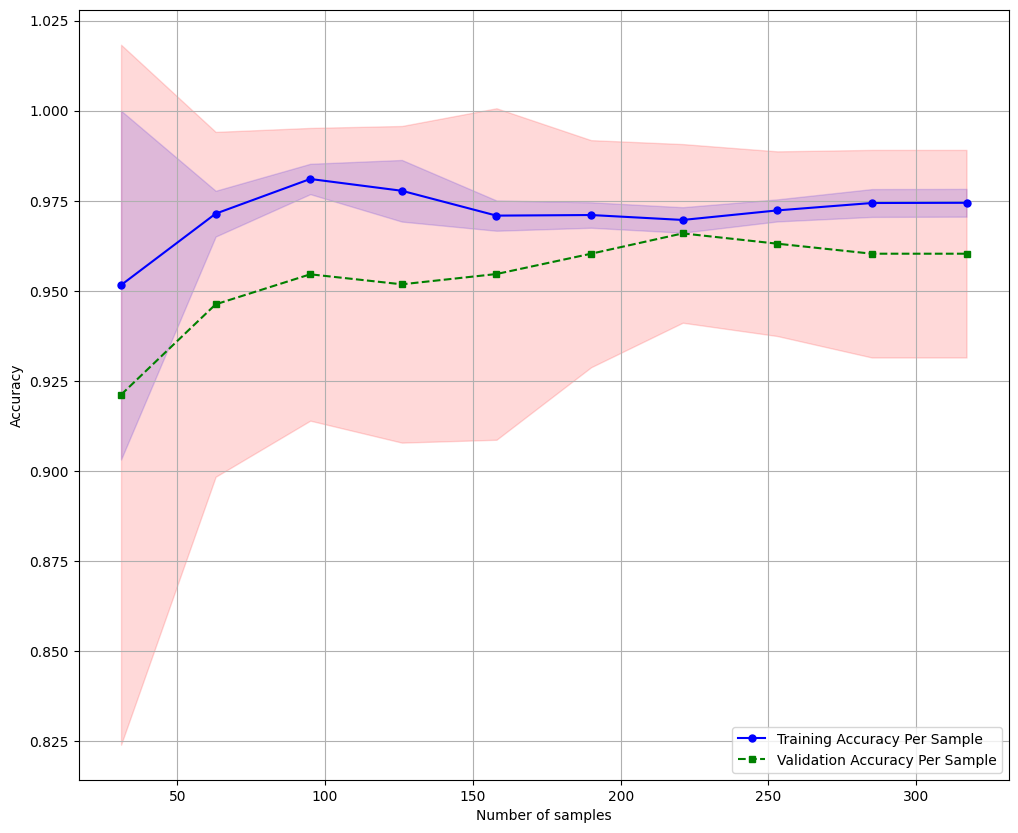

Confusion Matrix
[[ 50  14]
 [  5 102]]
Accuracy: 0.8889, Precision: 0.8793, Recall: 0.9533, F1: 0.9148, AUC: 0.9481


In [2]:
outlier_params = {'n_estimators': 1000, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'if', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'umap', {})

helper.train_and_evaluate_model('xgb', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)